<a href="https://colab.research.google.com/github/ECarateu/data-drive-insights/blob/main/student-performance-women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto: Data-Driven Insights - Desempenho Escolar - Foco em Mulheres

Abaixo temos algumas análises de dados de performance de estudante, com base na seguinte fonte: https://archive.ics.uci.edu/dataset/320/student+performance
. Os dados estão contidos na base student-mat.csv, e o foco principal é analisar estudantes do sexo ***feminino***.
Abaixo são utilizados recursos do Python como listas, dicionários, tuplas, estruturas condicionais, loops, pandas, numpy e matplotlib para gerar insights.

In [3]:
#importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# upload do arquivo
from google.colab import files
uploaded = files.upload()

#leitura da base e criação de uma tabela chamada df
df = pd.read_csv("student-mat.csv", sep=';')

#filtro apenas aluna e salvo  e exibo as 5 primeiras linhas a tabela df_fem para começar analisar insights
df_fem = df[df['sex'] == 'F'].copy()
df_fem.head()


Saving student-mat.csv to student-mat.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
#Cria um dicionário para tradução dos nomes das escolas
escolas = {'GP': 'Gabriel Pereira', 'MS': 'Mousinho da Silveira'}

#Cria uma lista com os nomes das colunas que são as notas das alunas
notas = ['G1', 'G2', 'G3']

#Cria uma tupla com todas as idades diferentes encontradas entre as alunas, em ordem crescente.
idades_unicas = tuple(sorted(df_fem['age'].unique()))

print("Notas:", notas)
print("Escolas:", escolas)
print("Idades encontradas:", idades_unicas)


Notas: ['G1', 'G2', 'G3']
Escolas: {'GP': 'Gabriel Pereira', 'MS': 'Mousinho da Silveira'}
Idades encontradas: (np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20))


In [14]:
#Aqui analisei quantas meninas foram aprovadas e reprovadas no total e logo após verifiquei quantas foram aprovadas por escola
aprovadas = 0
reprovadas = 0

for nota in df_fem['G3']:
    if nota >= 10:
        aprovadas += 1
    else:
        reprovadas += 1

print(f"Total de alunas: {len(df_fem)}")
print(f"Aprovadas: {aprovadas}")
print(f"Reprovadas: {reprovadas}")

def verificar_situacao(nota):
    if nota >= 10:
        return 'Aprovada'
    else:
        return 'Reprovada'

df_fem['situacao'] = df_fem['G3'].apply(verificar_situacao)

# Conta quantas foram aprovadas por escola
aprovadas_por_escola = df_fem[df_fem['situacao'] == 'Aprovada'].groupby('school').size()

print("Aprovadas por escola:")
print(aprovadas_por_escola)

Total de alunas: 208
Aprovadas: 133
Reprovadas: 75

Aprovadas por escola:
school
GP    116
MS     17
dtype: int64


In [18]:
# Analisei qual a média das alunas
notas_array_fem = df_fem[notas].to_numpy()
media_numpy = np.mean(notas_array_fem, axis=1)
print("Médias das alunas:", media_numpy[:5])


Médias das alunas: [ 5.66666667  5.33333333  8.33333333 14.66666667  8.66666667]


In [22]:
#Calculei a média da NF (nota final) separada por escola
media_por_escola_fem = df_fem.groupby('school')['G3'].mean()
#organizei numa tabela de quantas foram reprovadas e aprovadas
situacao_por_escola_fem = df_fem.groupby(['school', 'situacao']).size().unstack()
situacao_por_escola_fem


situacao,Aprovada,Reprovada
school,,
GP,116,67
MS,17,8


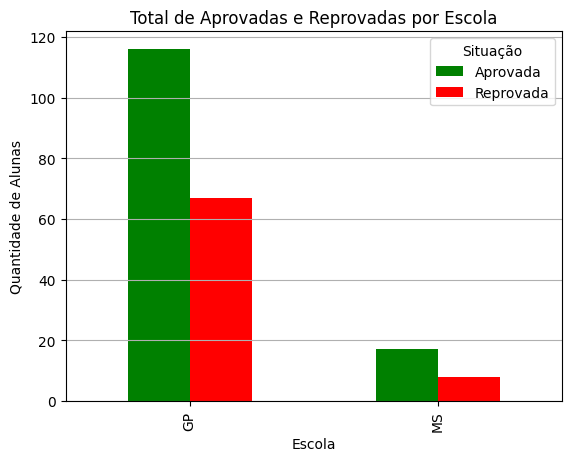

In [28]:
# Aprovadas e reprovadas por escola
situacao_por_escola_fem.plot(kind='bar', stacked=False, color=['green', 'red'])

plt.title('Total de Aprovadas e Reprovadas por Escola')
plt.xlabel('Escola')
plt.ylabel('Quantidade de Alunas')
plt.legend(title='Situação')
plt.grid(axis='y')
plt.show()

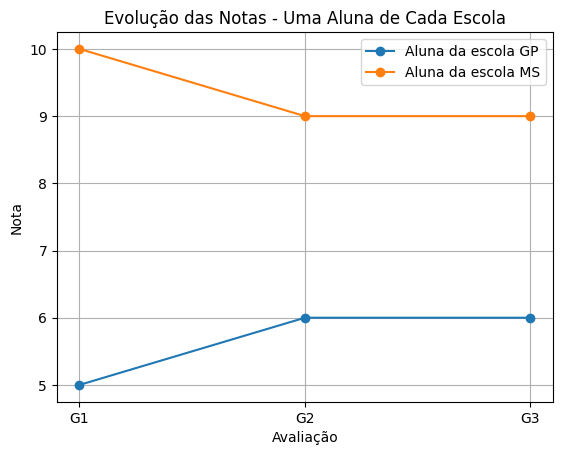

In [30]:

# Evolução notas das alunas por cada escola
aluna_gp = df_fem[df_fem['school'] == 'GP'].iloc[0]

aluna_ms = df_fem[df_fem['school'] == 'MS'].iloc[0]

plt.plot(notas, aluna_gp[notas], marker='o', label='Aluna da escola GP')
plt.plot(notas, aluna_ms[notas], marker='o', label='Aluna da escola MS')

plt.title("Evolução das Notas - Uma Aluna de Cada Escola")
plt.xlabel("Avaliação")
plt.ylabel("Nota")
plt.legend()
plt.grid(True)
plt.show()


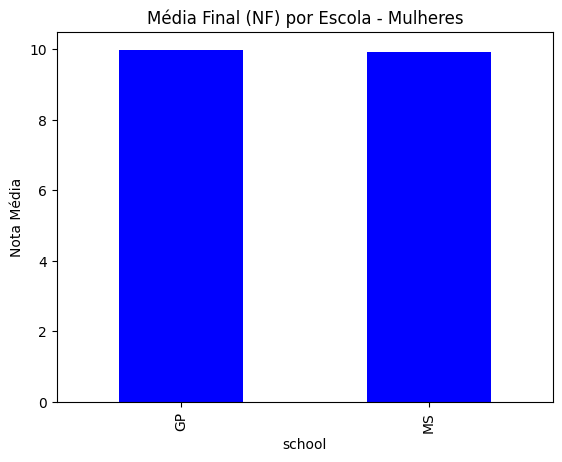

In [33]:

# Barras - média de G3 por escola
media_por_escola_fem.plot(kind='bar', color='blue')
plt.title("Média Final (NF) por Escola - Mulheres")
plt.ylabel("Nota Média")
plt.show()



## Insights

- As alunas apresentam padrões de desempenho variados, mas a média geral é positiva.
- A escola GP se destaca com notas ligeiramente superiores entre as mulheres.
- A escola GP se apesar de se destacar com mais volumetria de notas, também tem alto número de reprovação.
- Na escola MS as mulheres começam com notas boas no (G1) mas caiem nas proximas avaliações (G2 e G3).
- Normalmente as notas iniciais (G1) tem correlação com a nota final (G3), ou seja, performam bem no ciclo 1 e no final.
